# Predicting Academic Outcomes and Risk Patterns in Students
Using Demographic and Behavioral Factors
**Dataset:** Student Exam Performance (OpenDataBay)



In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# For ML
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.tree import DecisionTreeClassifier


In [12]:
df = pd.read_csv("exams.csv")
df.head()
df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


,math score,reading score,writing score
count,1000.000000,1000.000000,1000.000000
mean,66.396000,69.002000,67.738000
std,15.402871,14.737272,15.600985
min,13.000000,27.000000,23.000000
25%,56.000000,60.000000,58.000000
50%,66.500000,70.000000,68.000000
75%,77.000000,79.000000,79.000000
max,100.000000,100.000000,100.000000


In [13]:
# 1. Total Score
df["total_score"] = df["math score"] + df["reading score"] + df["writing score"]

# 2. Performance Level (based on total score out of 300)
def classify_performance(score):
    if score >= 240:
        return "High"
    elif score >= 180:
        return "Medium"
    else:
        return "Low"

df["performance_level"] = df["total_score"].apply(classify_performance)

# Preview the changes
df[["total_score", "performance_level"]].head()


,total_score,performance_level
0,197,Medium
1,154,Low
2,169,Low
3,223,Medium
4,219,Medium


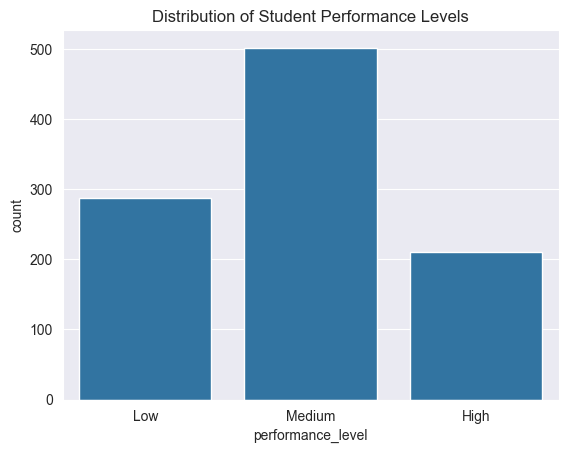

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x="performance_level", data=df, order=["Low", "Medium", "High"])
plt.title("Distribution of Student Performance Levels")
plt.show()


In [15]:
from sklearn.preprocessing import LabelEncoder

# Create a copy to avoid altering original DataFrame
df_encoded = df.copy()

# Columns to encode
cat_cols = ["gender", "race/ethnicity", "parental level of education", "lunch", "test preparation course", "performance_level"]

# Apply label encoding
label_encoders = {}
for col in cat_cols:
    le = LabelEncoder()
    df_encoded[col] = le.fit_transform(df_encoded[col])
    label_encoders[col] = le  # store encoders in case we want to decode later


In [16]:
# Check what 0 and 1 mean for 'gender'
label_encoders["gender"].classes_
df_encoded.head()


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total_score,performance_level
0,1,0,2,1,0,67,67,63,197,2
1,0,3,5,0,1,40,59,55,154,1
2,1,4,4,0,1,59,60,50,169,1
3,1,1,2,1,1,77,78,68,223,2
4,1,4,0,1,0,78,73,68,219,2


words encoding stage

In [17]:
from sklearn.model_selection import train_test_split

# Define features and target
X = df_encoded.drop(columns=["performance_level"])
y = df_encoded["performance_level"]

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


model training

In [18]:
from sklearn.tree import DecisionTreeClassifier

# Initialize and train
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)


,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


Accuracy: 1.0

Classification Report:
              precision    recall  f1-score   support

         Low       1.00      1.00      1.00        42
      Medium       1.00      1.00      1.00        57
        High       1.00      1.00      1.00       101

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200



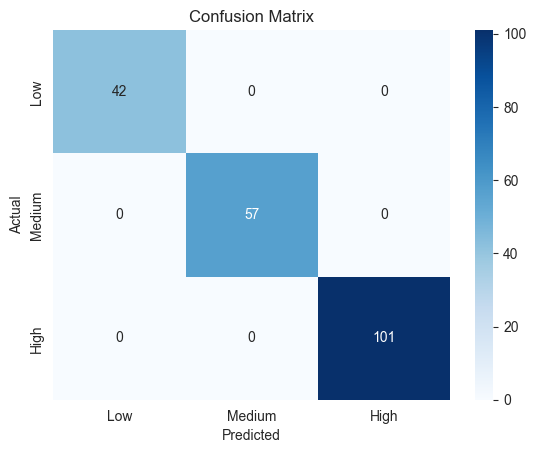

In [19]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Predictions
y_pred = model.predict(X_test)

# Accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))

# Detailed report
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=["Low", "Medium", "High"]))

# Confusion matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", xticklabels=["Low", "Medium", "High"], yticklabels=["Low", "Medium", "High"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


In [20]:
df.to_csv("cleaned_student_data.csv", index=False)
